# **1.Veri Seti Yükleme & Veriye Ön Bakış**

In [1]:
##Kütüphanelerin import edilmesi.
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


In [2]:
##Veri Setini Yükleme
df=pd.read_csv("/kaggle/input/new-marketing-campaign/new_marketing_campaign.csv")

In [3]:
##Eksik Değer Oluşturma
import random
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:

    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing
    
    

In [4]:
df=add_random_missing_values(df)

In [5]:
##İlk 10 Satır
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,e20d011e-c904-4301-871d-4120e734f189,1956,2n Cycle,Together,40831.0,0.0,1,2022-07-21,62.0,636.0,84.0,549.0,176.0,86.0,93.0,2.0,6.0,11.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,11.0,1.0
1,9038499f-e82e-43d3-803d-165dba9afe48,1950,Graduation,Together,22537.0,1.0,1,2021-11-05,42.0,6.0,2.0,8.0,18.0,4.0,11.0,3.0,2.0,NaN,3.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,11.0,1.0
2,a3aaaf2a-c063-45ba-ac1a-ab375d53faa3,1960,PhD,Together,195755.0,1.0,0,2015-12-24,28.0,383.0,51.0,130.0,124.0,18.0,37.0,0.0,9.0,2.0,9.0,NaN,0.0,1.0,0.0,1.0,1.0,0.0,NaN,11.0,1.0
3,fabc6e91-6e59-4dd6-8d07-572b7f07b9e4,1980,PhD,Divorced,143143.0,0.0,0,2017-06-14,24.0,29.0,0.0,20.0,1.0,6.0,1.0,1.0,2.0,2.0,5.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
4,6bf0b99f-dd6d-4964-a3ca-1e98f500d9e1,1977,Graduation,Married,84648.0,0.0,1,2021-06-17,92.0,133.0,41.0,124.0,28.0,21.0,9.0,3.0,3.0,1.0,5.0,7.0,1.0,1.0,1.0,1.0,1.0,NaN,3.0,11.0,0.0
5,0d05a5a7-3499-4bd4-9865-f4dfe8ef66c9,1963,PhD,Single,73709.0,1.0,0,2014-07-30,20.0,550.0,43.0,97.0,8.0,38.0,13.0,0.0,4.0,6.0,9.0,8.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,11.0,1.0
6,ea048844-af72-45a8-8e2c-8458ea7eac7c,1966,Graduation,Together,77065.0,2.0,0,2014-10-19,34.0,250.0,67.0,162.0,45.0,50.0,23.0,3.0,8.0,0.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,11.0,0.0
7,dc593f0b-1819-41bf-85e9-3676251df3b3,1980,Master,Married,157205.0,1.0,NaN,2017-09-25,30.0,55.0,12.0,52.0,16.0,9.0,21.0,4.0,4.0,1.0,4.0,7.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,11.0,1.0
8,cf21d3d2-c558-4617-b45c-07ef05bd1e35,1972,Graduation,Married,42253.0,0.0,0,2020-09-19,22.0,45.0,1.0,NaN,9.0,10.0,0.0,3.0,4.0,2.0,1.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,11.0,0.0
9,5130d4ac-09f1-4bc2-8bb6-4ecf23a9d684,NaN,Graduation,Married,63106.0,0.0,0,2018-01-01,67.0,14.0,4.0,5.0,6.0,3.0,9.0,2.0,0.0,2.0,1.0,19.0,1.0,0.0,1.0,0.0,NaN,0.0,3.0,11.0,1.0


In [6]:
##Son 10 Satır(Gözlem)
df.tail(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
335996,c36b6260-8fc4-41a9-be8b-2961e1836944,1949,Graduation,Single,129987.0,0.0,0,2020-06-08,54.0,433.0,3.0,33.0,5.0,1.0,12.0,8.0,7.0,2.0,5.0,5.0,1.0,NaN,0.0,1.0,0.0,0.0,3.0,11.0,0.0
335997,b86e0da6-aa38-41cb-be03-4d61dc9105cc,1982,Master,Married,62691.0,NaN,1,2014-12-15,95.0,934.0,47.0,222.0,33.0,4.0,24.0,2.0,0.0,4.0,15.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,11.0,1.0
335998,c4b3f9f5-7367-459e-a3a4-d87acc72bde2,NaN,PhD,Together,46850.0,0.0,0,2021-12-20,9.0,473.0,29.0,211.0,NaN,25.0,56.0,3.0,6.0,3.0,11.0,4.0,NaN,1.0,1.0,1.0,1.0,0.0,3.0,11.0,0.0
335999,ebfcd411-46e0-44c5-915b-17ff3a5d1641,1958,Graduation,Married,148829.0,1.0,0,2013-06-07,43.0,NaN,6.0,64.0,16.0,8.0,18.0,3.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,11.0,0.0
336000,69,Graduation,Divorced,1314,0.0,1.0,2016-08-17,79,32.0,7.0,2.0,10.0,8.0,9.0,0.0,2.0,1.0,3.0,8.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,11.0,1.0,NaN
336001,1af1bd76-52b2-4857-8dda-a9053dd85ca8,1964,Graduation,Single,2784.0,0.0,1,2014-04-08,47.0,749.0,41.0,185.0,27.0,116.0,249.0,4.0,8.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
336002,45ea8964-98a2-4ae3-9bd8-ca470261bc74,1942,Master,Married,88181.0,0.0,1,NaN,58.0,445.0,0.0,24.0,7.0,2.0,10.0,5.0,8.0,1.0,4.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,3.0,11.0,0.0
336003,6dacecdf-4e80-4fb0-a868-814d46311521,1984,Graduation,Married,80874.0,0.0,NaN,2015-09-06,87.0,955.0,49.0,210.0,47.0,3.0,22.0,1.0,1.0,1.0,15.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,11.0,NaN
336004,3dcc3be0-9469-4ae2-8574-b1acaec04b45,1957,Graduation,Single,43801.0,1.0,1,2015-12-21,12.0,448.0,29.0,218.0,85.0,34.0,58.0,1.0,5.0,6.0,12.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,11.0,1.0
336005,a9181eb2-2ba5-4e9c-95fb-79d1295e3661,1949,Graduation,Single,61036.0,1.0,1,2014-01-19,38.0,97.0,1.0,61.0,5.0,1.0,27.0,2.0,5.0,2.0,3.0,6.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,11.0,0.0


In [7]:
##Veri Setinin Boyutu
print("Sütun Sayısı",df.shape[1])
print("Satır Sayısı",df.shape[0])

Sütun Sayısı 29
Satır Sayısı 336006


In [8]:
###Tekrar Eden Veri Var mı Kontrol Edelim
if df.duplicated().any():
    print("Tekrar Eden Veri Var.")
else:
     print("Tekrar Eden Veri Yok.")

Tekrar Eden Veri Yok.


In [9]:
##Sütunların Değişken Tipleri
df.dtypes

ID                      object
Year_Birth              object
Education               object
Marital_Status          object
Income                 float64
Kidhome                float64
Teenhome                object
Dt_Customer             object
Recency                float64
MntWines               float64
MntFruits              float64
MntMeatProducts        float64
MntFishProducts        float64
MntSweetProducts       float64
MntGoldProds           float64
NumDealsPurchases      float64
NumWebPurchases        float64
NumCatalogPurchases    float64
NumStorePurchases      float64
NumWebVisitsMonth      float64
AcceptedCmp3           float64
AcceptedCmp4           float64
AcceptedCmp5           float64
AcceptedCmp1           float64
AcceptedCmp2           float64
Complain               float64
Z_CostContact          float64
Z_Revenue              float64
Response               float64
dtype: object

In [10]:
##Bazı değişkenlerin veri tipi yanlış.Bunları değiştirelim.
##AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp1 sütünları boolean olduğu halde float(sayısal)  olarak depolanmış
##Complain şikayet olup olmamasını gösteriyor ama bu değişkende float olarak tutulmuş
##Response  müşterinin kampanyaya katılıp katılmadığı ama float olarak tutulmuş.

df['AcceptedCmp1'] = df['AcceptedCmp1'].astype(str) ##string olarak değiştirme
df['AcceptedCmp2'] = df['AcceptedCmp2'].astype(str)
df['AcceptedCmp3'] = df['AcceptedCmp3'].astype(str)
df['AcceptedCmp4'] = df['AcceptedCmp4'].astype(str)
df['AcceptedCmp5'] = df['AcceptedCmp5'].astype(str)
df['Complain'] = df['Complain'].astype(str)
df['Response'] = df['Response'].astype(str)   

In [11]:
##Gereksiz Sütunları Silelim
df = df.drop(columns=["ID"], axis=1)

In [12]:
##Z_Revenue ve Z_CostContact eşşiz değer sayısı 2 tane ve de dengesiz.Bu yüzden silelim.
print(df["Z_Revenue"].value_counts())
print("************")
print(df["Z_CostContact"].value_counts())

Z_Revenue
11.0    319631
1.0          1
Name: count, dtype: int64
************
Z_CostContact
3.0     319495
11.0         1
Name: count, dtype: int64


In [13]:
df = df.drop(columns=["Z_Revenue","Z_CostContact"], axis=1)

In [14]:
##Değişikliklerden sonra veriyi kontrol edelim.
df.dtypes


Year_Birth              object
Education               object
Marital_Status          object
Income                 float64
Kidhome                float64
Teenhome                object
Dt_Customer             object
Recency                float64
MntWines               float64
MntFruits              float64
MntMeatProducts        float64
MntFishProducts        float64
MntSweetProducts       float64
MntGoldProds           float64
NumDealsPurchases      float64
NumWebPurchases        float64
NumCatalogPurchases    float64
NumStorePurchases      float64
NumWebVisitsMonth      float64
AcceptedCmp3            object
AcceptedCmp4            object
AcceptedCmp5            object
AcceptedCmp1            object
AcceptedCmp2            object
Complain                object
Response                object
dtype: object

In [15]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1956,2n Cycle,Together,40831.0,0.0,1,2022-07-21,62.0,636.0,84.0,549.0,176.0,86.0,93.0,2.0,6.0,11.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,1950,Graduation,Together,22537.0,1.0,1,2021-11-05,42.0,6.0,2.0,8.0,18.0,4.0,11.0,3.0,2.0,NaN,3.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1960,PhD,Together,195755.0,1.0,0,2015-12-24,28.0,383.0,51.0,130.0,124.0,18.0,37.0,0.0,9.0,2.0,9.0,NaN,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,1980,PhD,Divorced,143143.0,0.0,0,2017-06-14,24.0,29.0,0.0,20.0,1.0,6.0,1.0,1.0,2.0,2.0,5.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1977,Graduation,Married,84648.0,0.0,1,2021-06-17,92.0,133.0,41.0,124.0,28.0,21.0,9.0,3.0,3.0,1.0,5.0,7.0,1.0,1.0,1.0,1.0,1.0,nan,0.0


# **2.Eksik Değerlerin Analizi**

In [16]:
na_cols = []

# Veri çerçevesindeki her sütun için kontrol yap
for col in df.columns:
    if df[col].isnull().sum() > 0:
        na_cols.append(col)

# Eksik veri içeren sütunları yazdır
print("Eksik veri içeren sütunlar:", na_cols)

Eksik veri içeren sütunlar: ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


In [17]:
df.isna().sum()

Year_Birth             16372
Education              16272
Marital_Status         16475
Income                 16381
Kidhome                16326
Teenhome               16485
Dt_Customer            16590
Recency                16344
MntWines               16471
MntFruits              16305
MntMeatProducts        16579
MntFishProducts        16427
MntSweetProducts       16461
MntGoldProds           16404
NumDealsPurchases      16530
NumWebPurchases        16419
NumCatalogPurchases    16364
NumStorePurchases      16302
NumWebVisitsMonth      16555
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Response                   0
dtype: int64

In [18]:
##Sayısal değişkenlerde eksik değerlerin medyan ile doldurulması
##Sayısal değişkenlerle liste oluşturma.
sayisal_deger = [
    col for col in df[na_cols].columns
    if  df[col].dtype == 'float64']

print(sayisal_deger)

['Income', 'Kidhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


In [19]:
for col in df[sayisal_deger].columns:
    df[col].fillna(df[col].median(), inplace=True)
    
    

print(df[sayisal_deger].isnull().sum())

Income                 0
Kidhome                0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64


In [20]:
##Kategorik Değişkenlerde Eksik Değerleri Mod ile Dolduralım.
##Kategorik Değişkenleri Listeye Ekleme
kategorik_deger = [
    col for col in df[na_cols].columns
    if  df[col].dtype == 'object']

print(kategorik_deger)

['Year_Birth', 'Education', 'Marital_Status', 'Teenhome', 'Dt_Customer']


In [21]:
for col in df[kategorik_deger].columns:
     df[col].fillna(df[col].mode()[0], inplace=True)
print(df[kategorik_deger].isnull().sum())
##Year_Birth kategorik değil ama mod ile doldurduğumuz için sorun teşkil etmiyor bu aşamada.

Year_Birth        0
Education         0
Marital_Status    0
Teenhome          0
Dt_Customer       0
dtype: int64


In [22]:
##Gizli Olarak Eksik Değer İçeren Sütunlarımız Var.İlk 5 gözlemde gözüküyor.Bunları kontrol edelim.
nan_string_columns = [col for col in df.columns if df[col].apply(lambda x: str(x).lower() == 'nan').any()]

# "nan" içeren sütunları yazdır
print("String olarak 'nan' içeren sütunlar:", nan_string_columns)

String olarak 'nan' içeren sütunlar: ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


In [23]:
# "nan" değerleri NaN ile değiştirelim.
df.replace('nan', np.nan, inplace=True)


In [24]:
for col in df[nan_string_columns].columns:
     df[col].fillna(df[col].mode()[0], inplace=True)

# **3.İstatistiksel Analiz**

In [25]:
##İstatiksel analize başlamadan önce Age değişkenini oluşturalım.
df['Year_Birth'] = pd.to_numeric(df['Year_Birth'], errors='coerce')

current_year = 2024

# Age sütununu oluştur
df['Age'] = current_year - df['Year_Birth']


In [26]:
print(df['Age'].head())

0    68.0
1    74.0
2    64.0
3    44.0
4    47.0
Name: Age, dtype: float64


In [27]:
##Year_Birth sütununa analiz için gerek kalmadı.Bu sütnu silelim.
df.drop(columns=['Year_Birth'], inplace=True)

In [28]:
## Dt_Customer sütunu kullanarak register_year de
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
# 'register_year'
df['register_year'] = df['Dt_Customer'].dt.year
# 'register_month'
df['register_month'] = df['Dt_Customer'].dt.month
df.drop(columns=['Dt_Customer'], inplace=True)
print(df[["register_year","register_month"]].head())

   register_year  register_month
0         2022.0             7.0
1         2021.0            11.0
2         2015.0            12.0
3         2017.0             6.0
4         2021.0             6.0


In [29]:
##register_year ve register_month sütunları kategorik bu yüzden veri tipini string yapalım.
df['register_year'] = df['register_year'].astype(str)
df['register_month'] = df['register_month'].astype(str)


In [30]:
##Alttaki kodu yazarken hata aldım o yüzden eksik değer içeren bir satırı sildim.
df = df[df['Age'].notna()]

In [31]:
##Age,Kidhome,Teenhome veri tipini int yapalım.
df['Age'] = df['Age'].astype(int)
df['Kidhome'] = df['Kidhome'].astype(int)
df['Teenhome'] = df['Kidhome'].astype(int)

In [32]:
##Değişkenleri nümerik ve sayısal olarak ayıralım.
numeric_cols=[col for col in df.columns if df[col].dtype in ['int64', 'float64']]

In [33]:
categoric_cols=[col for col in df.columns if col not in numeric_cols]
print("Nümerik",numeric_cols)
print("-------------")
print("Kategorik",categoric_cols)

Nümerik ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age']
-------------
Kategorik ['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'register_year', 'register_month']


In [34]:
##Ortalama,Standart Sapma,Max,Min Değerler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,336005.0,79307.482784,123240.398316,1000.0,3266.0,42861.0,87245.0,666662.0
Kidhome,336005.0,0.420324,0.533790,0.0,0.0,0.0,1.0,2.0
Teenhome,336005.0,0.420324,0.533790,0.0,0.0,0.0,1.0,2.0
Recency,336005.0,48.695237,28.251519,0.0,25.0,49.0,73.0,103.0
MntWines,336005.0,301.626476,326.709292,0.0,40.0,176.0,480.0,1541.0
MntFruits,336005.0,25.684886,38.569327,0.0,3.0,8.0,30.0,203.0
MntMeatProducts,336005.0,161.588958,221.073702,0.0,17.0,66.0,217.0,1731.0
MntFishProducts,336005.0,39.783560,52.021102,0.0,9.0,18.0,47.0,278.0
MntSweetProducts,336005.0,27.548352,39.669287,0.0,5.0,10.0,31.0,272.0
MntGoldProds,336005.0,42.892061,50.910955,0.0,9.0,24.0,53.0,368.0


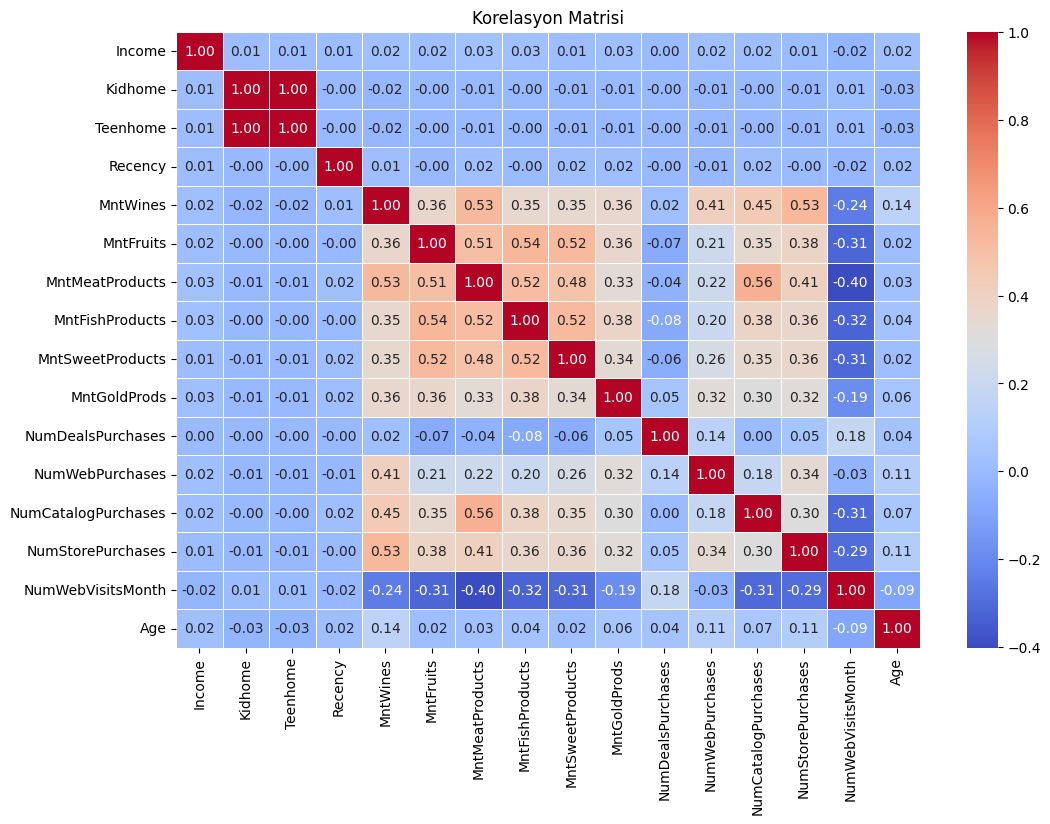

In [35]:
##Korelasyon Matrisi
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')

plt.show()


* 0.0 - 0.2: Çok zayıf ilişki 
* 0.2 - 0.4: Zayıf ilişki
* 0.4 - 0.6: Orta derecede ilişki
* 0.6 - 0.8: Güçlü ilişki
* 0.8 - 1.0: Çok güçlü ilişki

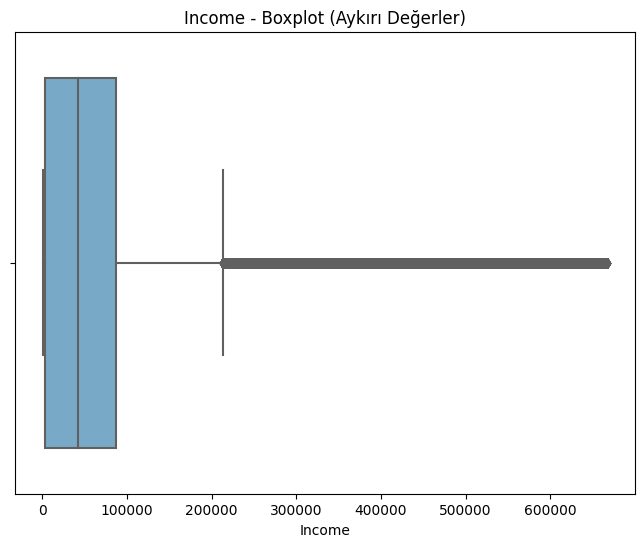

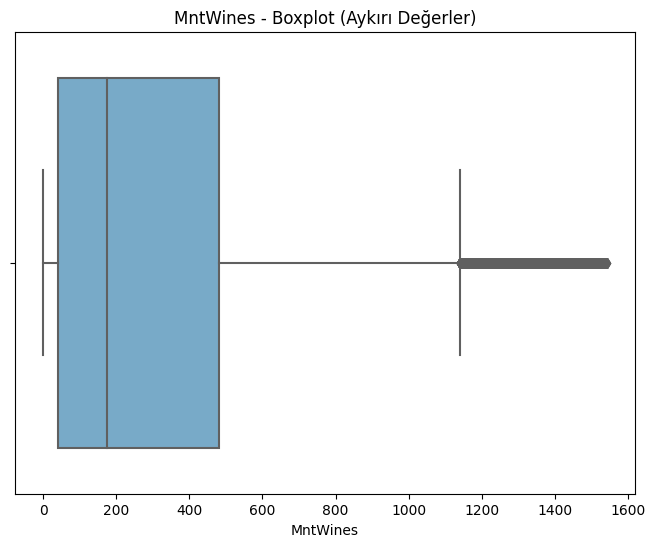

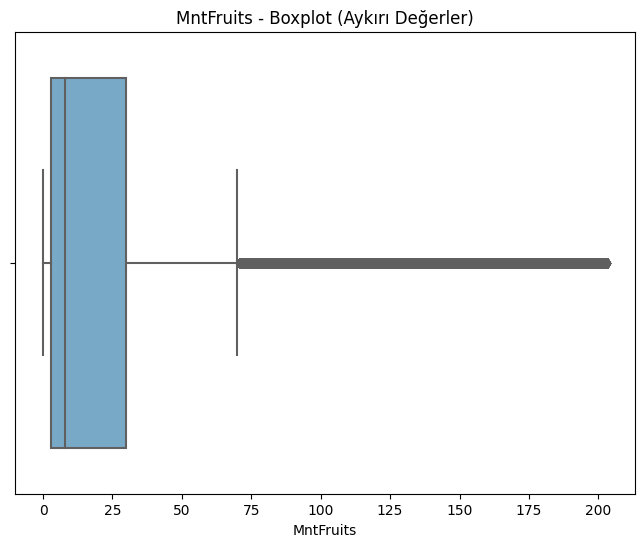

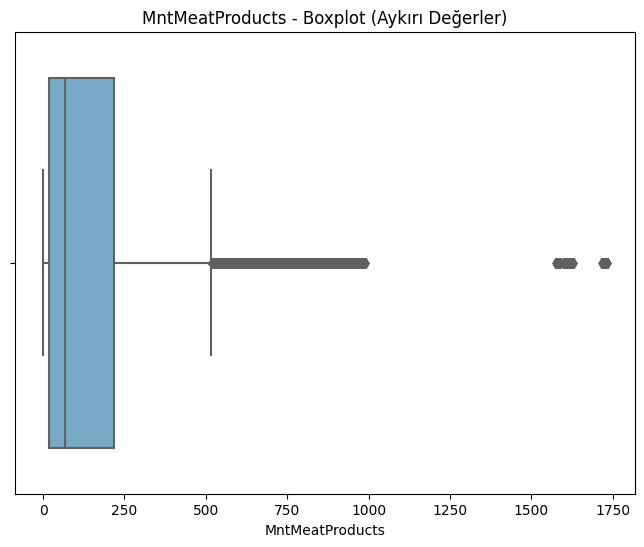

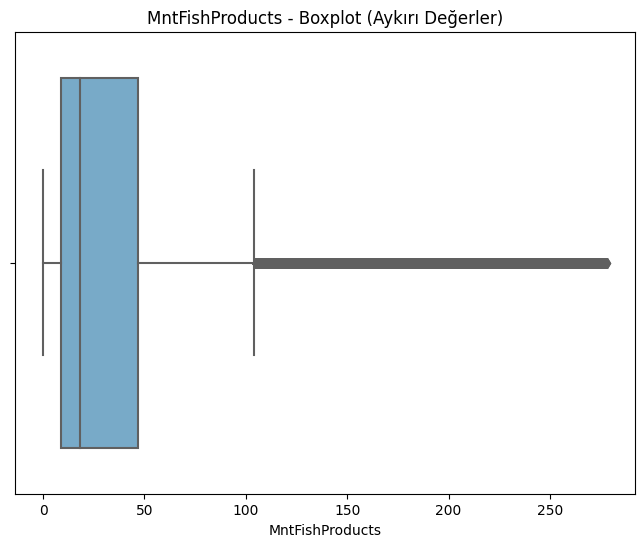

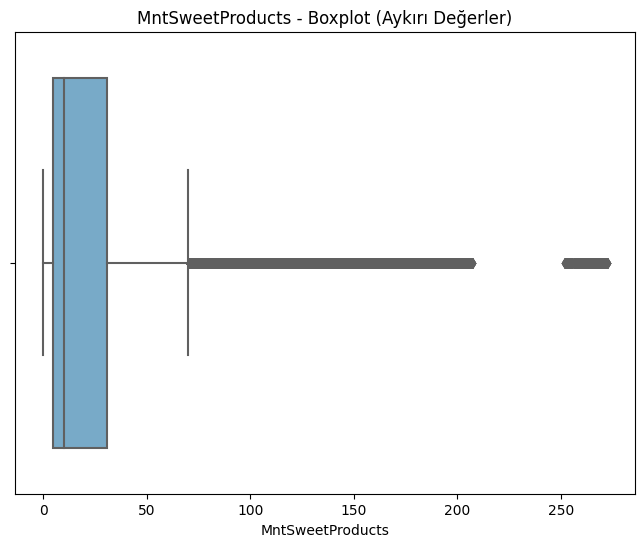

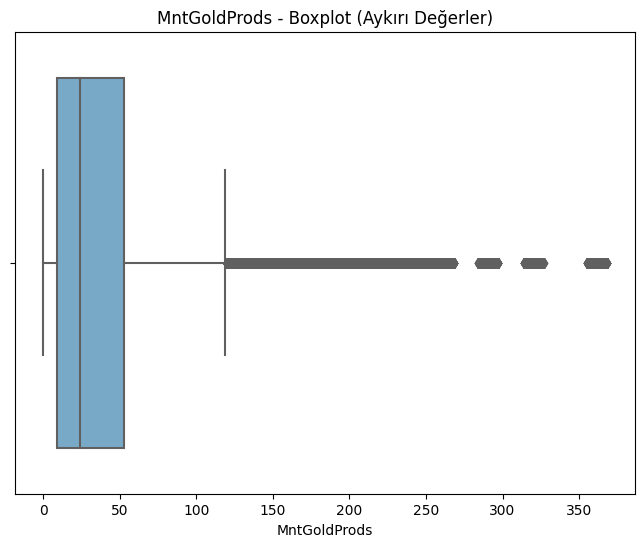

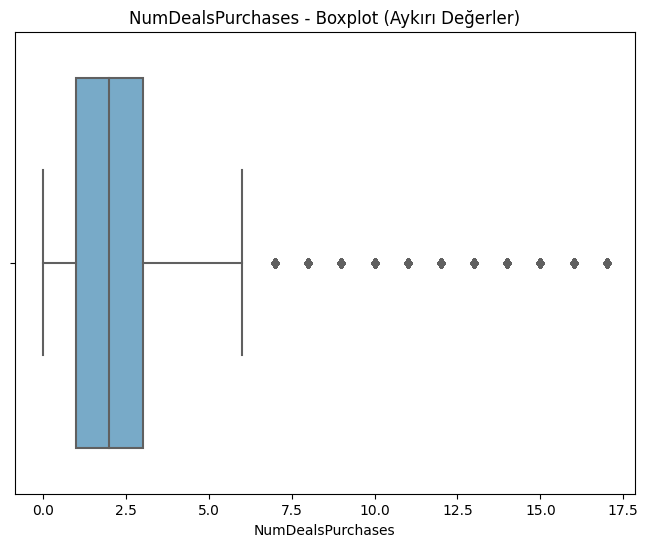

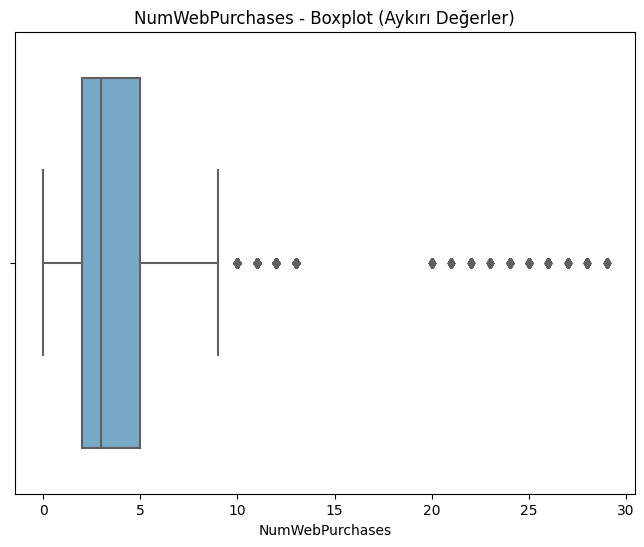

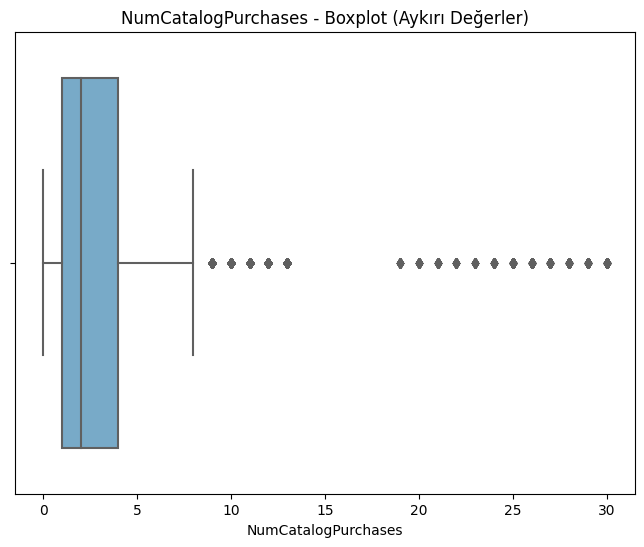

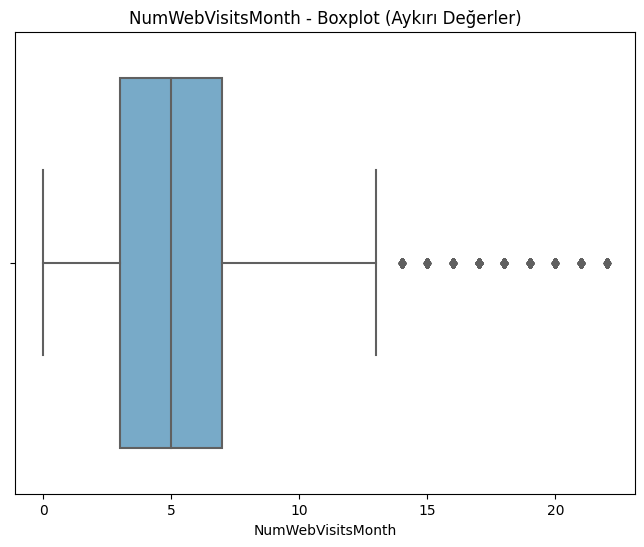

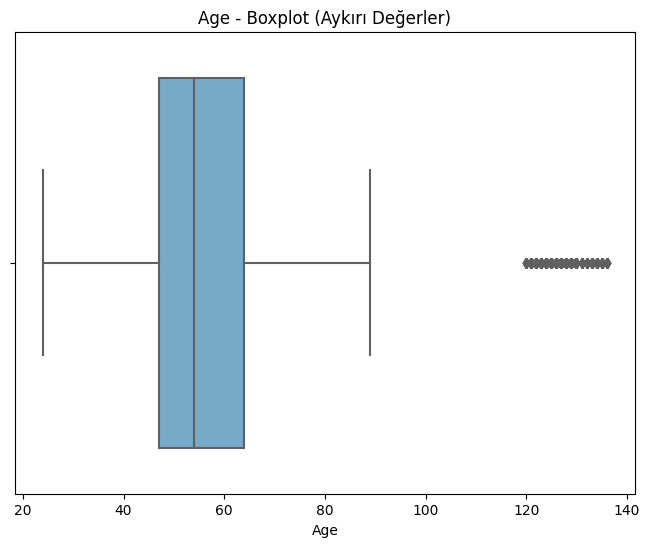

In [36]:
###Aykırı Değer Kontrolü ve Kutu Diyagramı
outlier_cols = []  # Aykırı değerlerin bulunduğu sütunları tutacak liste

for col in numeric_cols:
  
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Aykırı değer var mı kontrol et
    if df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0] > 0:
        outlier_cols.append(col)  # Aykırı değer bulunan sütunu listeye ekle

        # Aykırı değerlerin boxplot'unu çiz
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=col, palette='Blues')
        plt.title(f'{col} - Boxplot (Aykırı Değerler)')
        plt.show()


In [37]:
###Normallik Testi
for col in numeric_cols:
    # Shapiro-Wilk normallik testi
    stat, p_value = stats.shapiro(df[col])  # NaN değerleri atlamaya gerek yok

    print(f"{col} - p-değeri: {p_value:.4f}")
    
    # p-değeri 0.05'ten küçükse normal dağılmadığını kabul ederiz
    if p_value < 0.05:
        print(f"  {col} normal dağılmıyor.\n")
    else:
        print(f"  {col} normal dağılım gösteriyor.\n")

Income - p-değeri: 0.0000
  Income normal dağılmıyor.

Kidhome - p-değeri: 0.0000
  Kidhome normal dağılmıyor.

Teenhome - p-değeri: 0.0000
  Teenhome normal dağılmıyor.

Recency - p-değeri: 0.0000
  Recency normal dağılmıyor.

MntWines - p-değeri: 0.0000
  MntWines normal dağılmıyor.

MntFruits - p-değeri: 0.0000
  MntFruits normal dağılmıyor.

MntMeatProducts - p-değeri: 0.0000
  MntMeatProducts normal dağılmıyor.

MntFishProducts - p-değeri: 0.0000
  MntFishProducts normal dağılmıyor.

MntSweetProducts - p-değeri: 0.0000
  MntSweetProducts normal dağılmıyor.

MntGoldProds - p-değeri: 0.0000
  MntGoldProds normal dağılmıyor.

NumDealsPurchases - p-değeri: 0.0000
  NumDealsPurchases normal dağılmıyor.

NumWebPurchases - p-değeri: 0.0000
  NumWebPurchases normal dağılmıyor.

NumCatalogPurchases - p-değeri: 0.0000
  NumCatalogPurchases normal dağılmıyor.

NumStorePurchases - p-değeri: 0.0000
  NumStorePurchases normal dağılmıyor.

NumWebVisitsMonth - p-değeri: 0.0000
  NumWebVisitsMonth

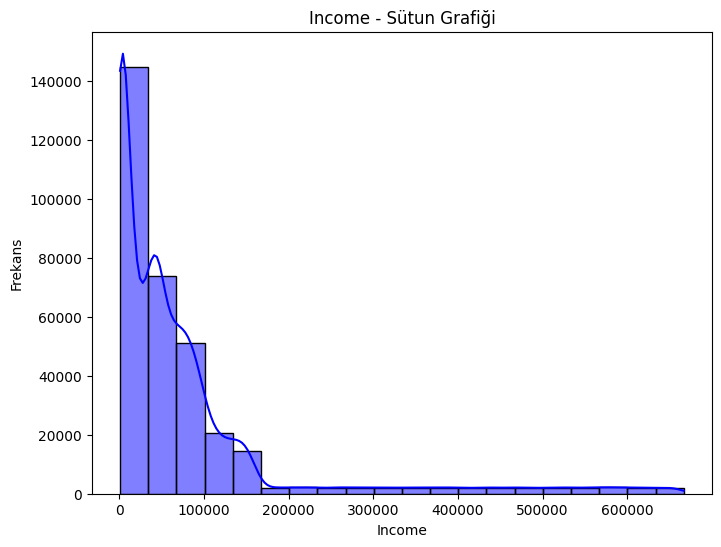

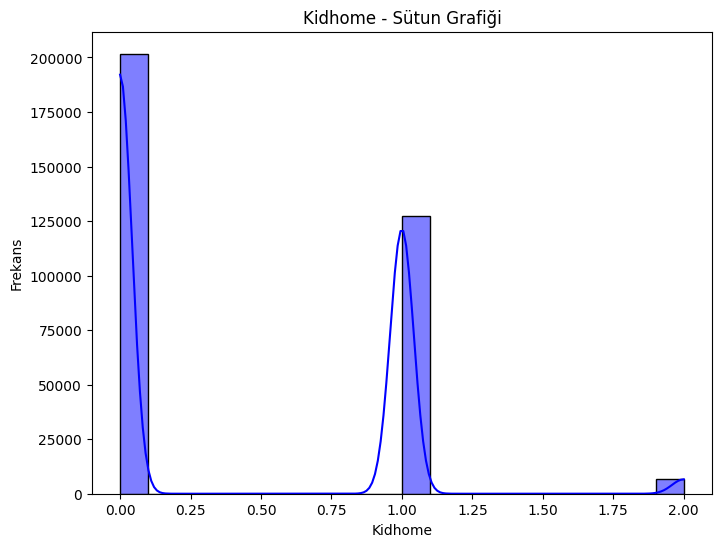

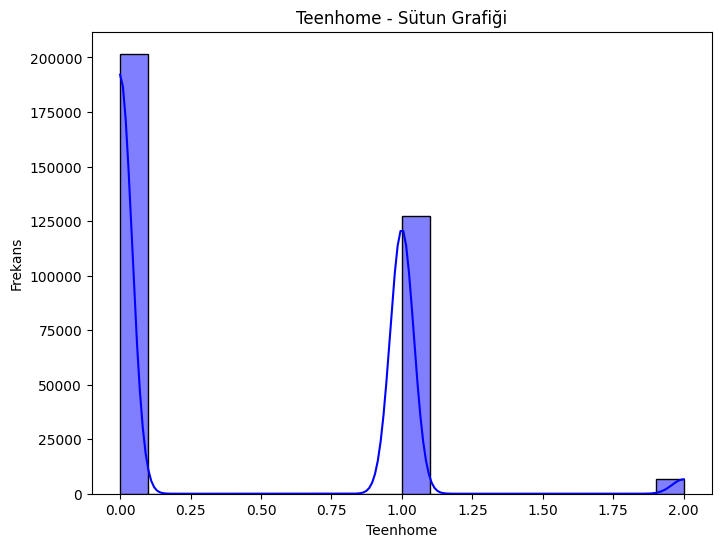

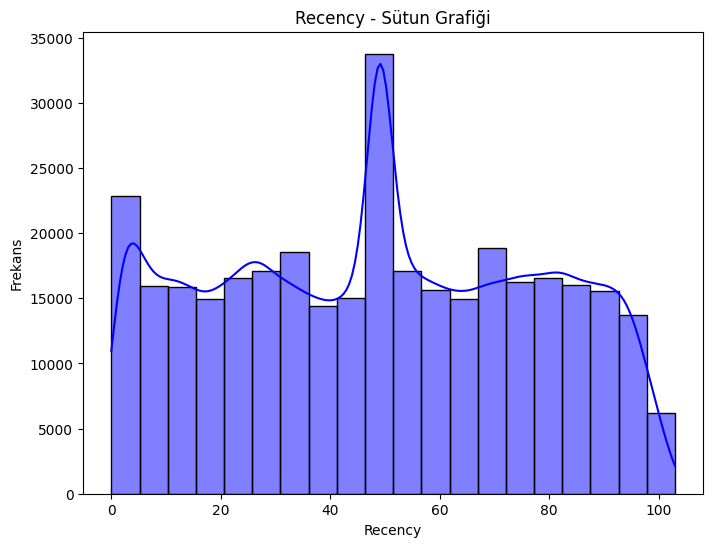

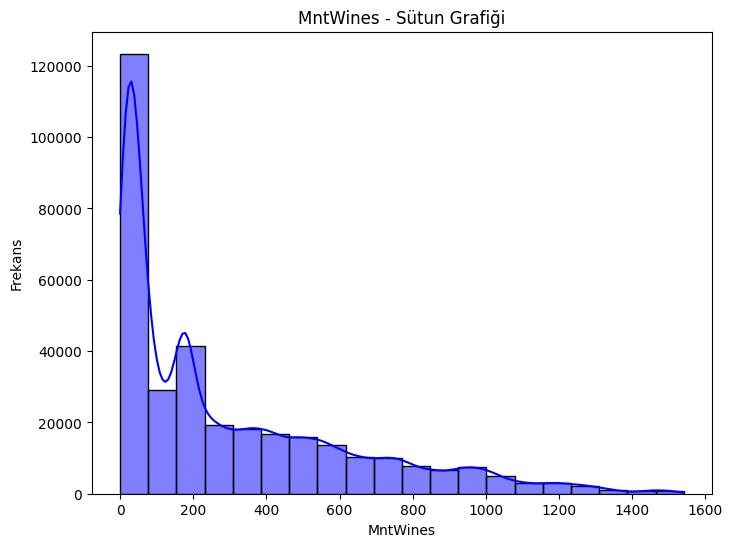

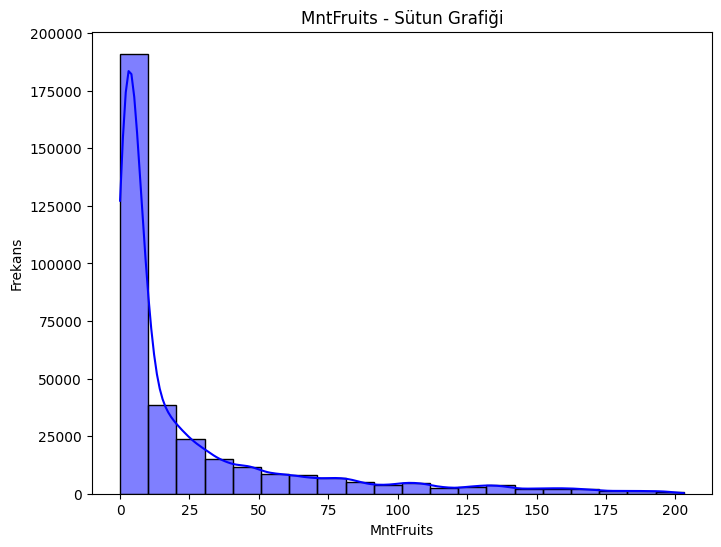

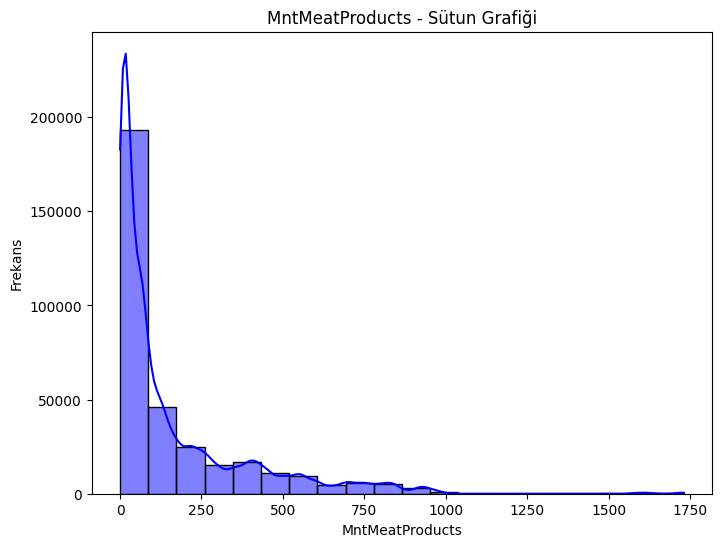

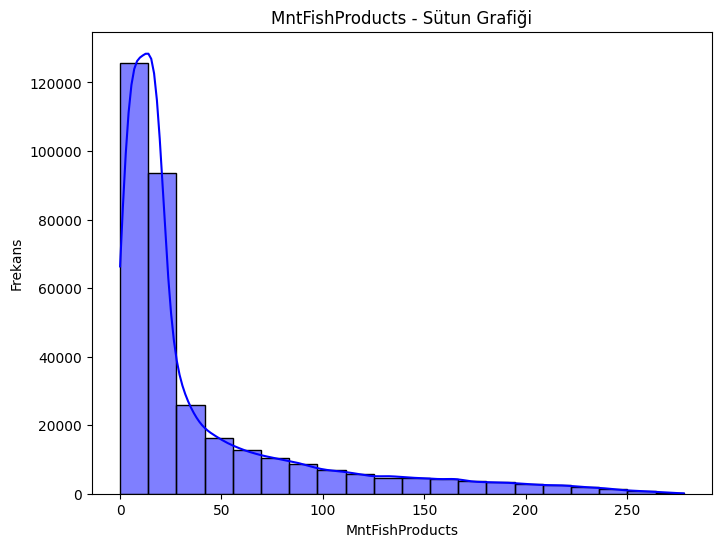

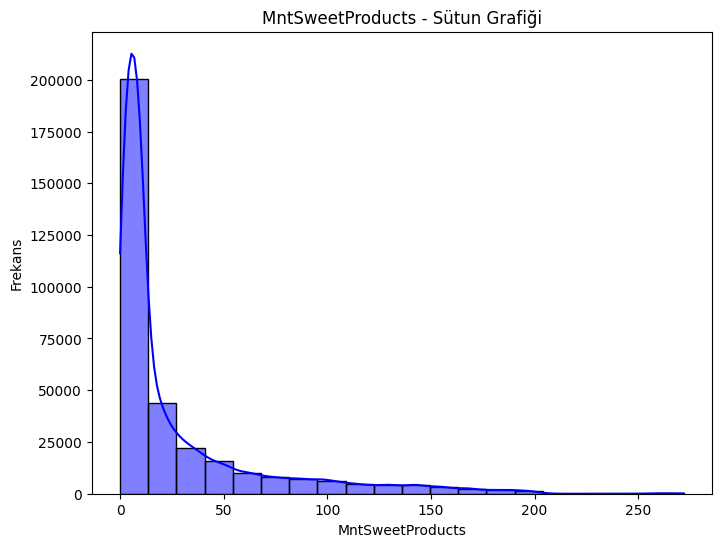

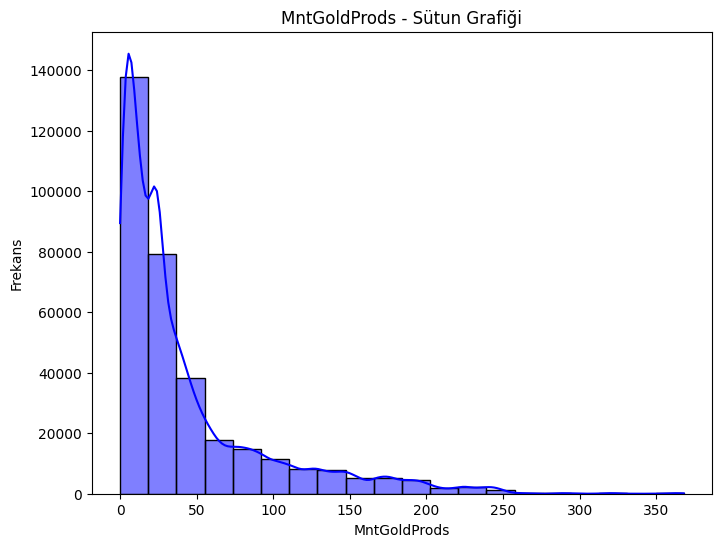

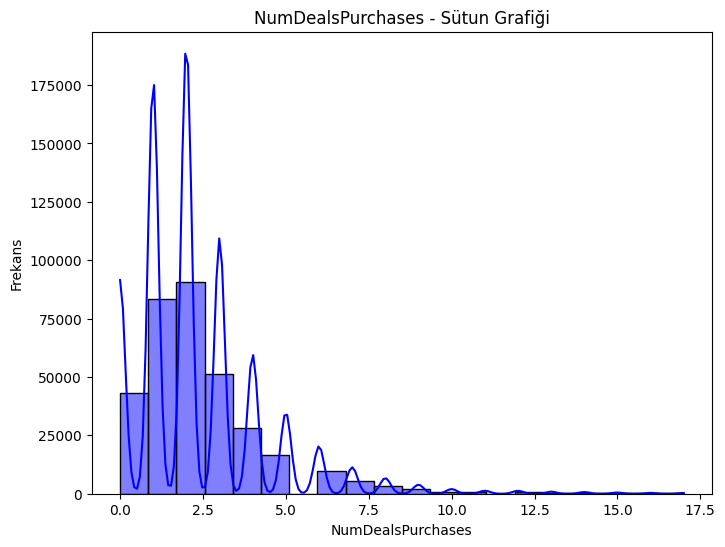

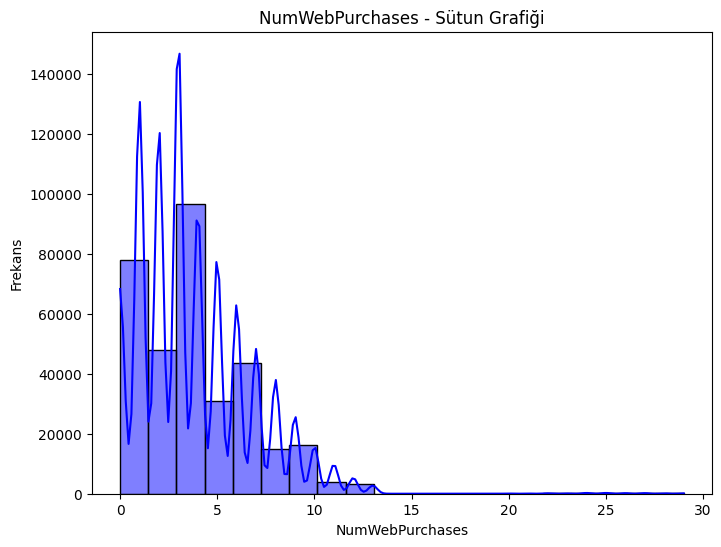

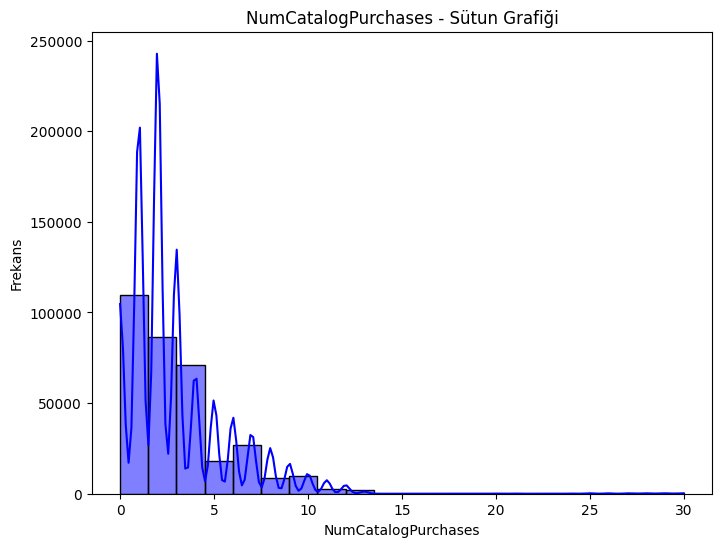

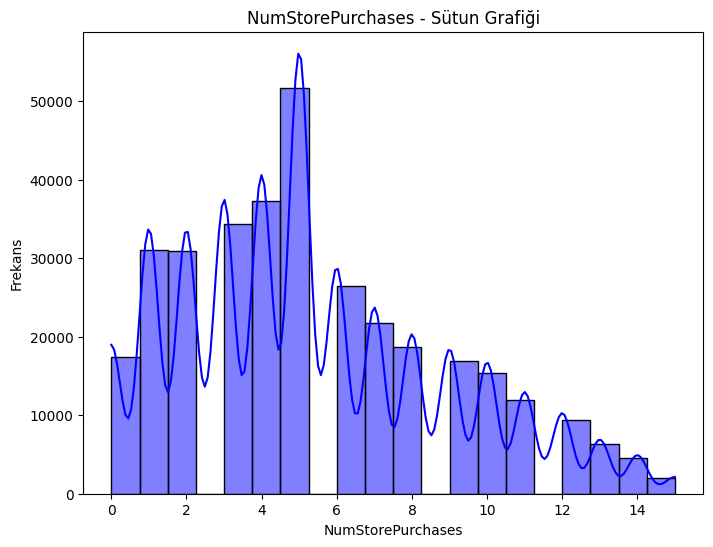

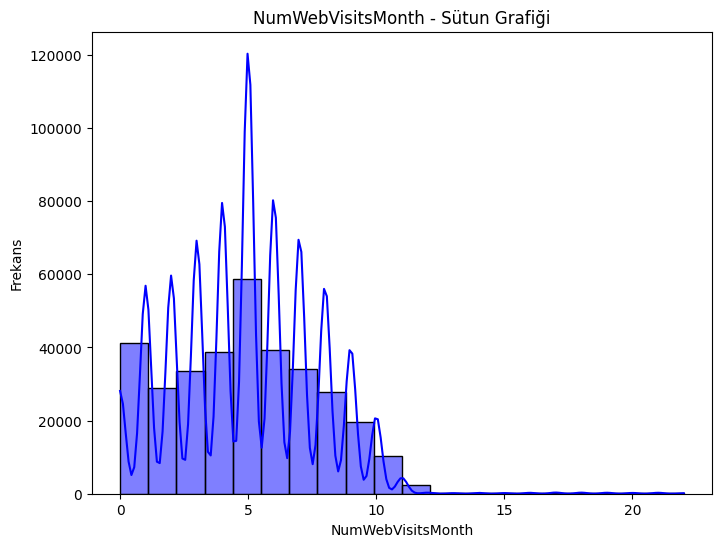

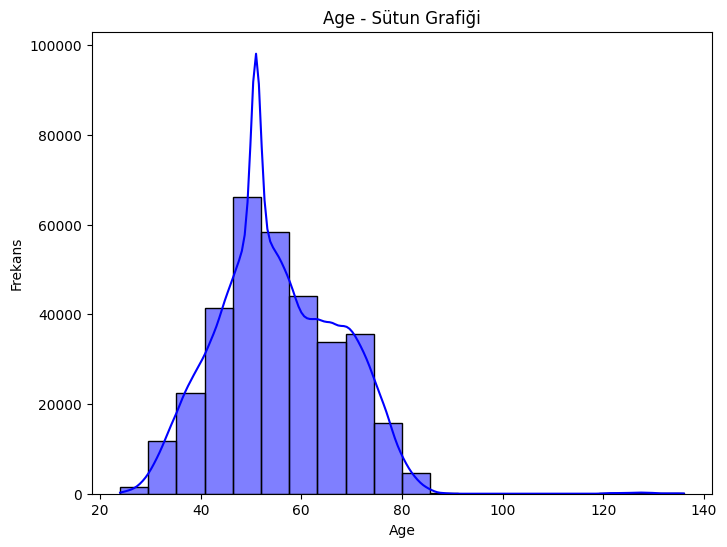

In [38]:
##Sütun Grafiği
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='blue', bins=20)  # KDE çizgisi olmadan histogram
    plt.title(f'{col} - Sütun Grafiği')
    plt.xlabel(col)
    plt.ylabel('Frekans')
    plt.show()

* Sütun grafiklerinden de anlaşılacağı üzere normal dağılıma uymuyorlar.
  

In [39]:
##Çarpıklık Değeri
for col in numeric_cols:
    skewness = df[col].skew()  # Çarpıklık hesaplama
    print(f"{col} - Çarpıklık: {skewness:.4f}")
    
    if skewness > 0:
        print(f"  {col} sağa çarpık \n")
    elif skewness < 0:
        print(f"  {col} sola çarpık\n")
    else:
        print(f"  {col} simetrik (normal) dağılım gösteriyor\n")

Income - Çarpıklık: 2.8625
  Income sağa çarpık 

Kidhome - Çarpıklık: 0.7273
  Kidhome sağa çarpık 

Teenhome - Çarpıklık: 0.7273
  Teenhome sağa çarpık 

Recency - Çarpıklık: 0.0121
  Recency sağa çarpık 

MntWines - Çarpıklık: 1.2723
  MntWines sağa çarpık 

MntFruits - Çarpıklık: 2.2167
  MntFruits sağa çarpık 

MntMeatProducts - Çarpıklık: 2.1665
  MntMeatProducts sağa çarpık 

MntFishProducts - Çarpıklık: 2.0664
  MntFishProducts sağa çarpık 

MntSweetProducts - Çarpıklık: 2.2753
  MntSweetProducts sağa çarpık 

MntGoldProds - Çarpıklık: 1.9783
  MntGoldProds sağa çarpık 

NumDealsPurchases - Çarpıklık: 1.9606
  NumDealsPurchases sağa çarpık 

NumWebPurchases - Çarpıklık: 1.3692
  NumWebPurchases sağa çarpık 

NumCatalogPurchases - Çarpıklık: 2.2206
  NumCatalogPurchases sağa çarpık 

NumStorePurchases - Çarpıklık: 0.5950
  NumStorePurchases sağa çarpık 

NumWebVisitsMonth - Çarpıklık: 0.3818
  NumWebVisitsMonth sağa çarpık 

Age - Çarpıklık: 0.3832
  Age sağa çarpık 



In [40]:
##Basıklık Hesaplama
for col in numeric_cols:
    kurtosis = df[col].kurt()  # Basıklık  hesaplama
    print(f"{col} - Basıklık (Kurtosis): {kurtosis:.4f}")
    
    if kurtosis > 0:
        print(f"  {col} leptokurtik (keskin zirve)\n")
    elif kurtosis < 0:
        print(f"  {col} platikurtik (düz zirve)\n")
    else:
        print(f"  {col} mesokurtik (normal zirve)\n")

Income - Basıklık (Kurtosis): 8.2722
  Income leptokurtik (keskin zirve)

Kidhome - Basıklık (Kurtosis): -0.6590
  Kidhome platikurtik (düz zirve)

Teenhome - Basıklık (Kurtosis): -0.6590
  Teenhome platikurtik (düz zirve)

Recency - Basıklık (Kurtosis): -1.1070
  Recency platikurtik (düz zirve)

MntWines - Basıklık (Kurtosis): 0.8905
  MntWines leptokurtik (keskin zirve)

MntFruits - Basıklık (Kurtosis): 4.5881
  MntFruits leptokurtik (keskin zirve)

MntMeatProducts - Basıklık (Kurtosis): 5.9626
  MntMeatProducts leptokurtik (keskin zirve)

MntFishProducts - Basıklık (Kurtosis): 3.7979
  MntFishProducts leptokurtik (keskin zirve)

MntSweetProducts - Basıklık (Kurtosis): 5.0664
  MntSweetProducts leptokurtik (keskin zirve)

MntGoldProds - Basıklık (Kurtosis): 3.9865
  MntGoldProds leptokurtik (keskin zirve)

NumDealsPurchases - Basıklık (Kurtosis): 6.7295
  NumDealsPurchases leptokurtik (keskin zirve)

NumWebPurchases - Basıklık (Kurtosis): 4.9004
  NumWebPurchases leptokurtik (keskin 

In [41]:
#Mod ve Medyan Hesaplama
for col in numeric_cols:
    median_value = df[col].median()  
    mode_value = df[col].mode()[0]
    print(f"{col} - Medyan: {median_value:.4f}")
    print(f"{col} - Mod: {mode_value:.4f}\n")
    print('-' * 40)

Income - Medyan: 42861.0000
Income - Mod: 42861.0000

----------------------------------------
Kidhome - Medyan: 0.0000
Kidhome - Mod: 0.0000

----------------------------------------
Teenhome - Medyan: 0.0000
Teenhome - Mod: 0.0000

----------------------------------------
Recency - Medyan: 49.0000
Recency - Mod: 49.0000

----------------------------------------
MntWines - Medyan: 176.0000
MntWines - Mod: 176.0000

----------------------------------------
MntFruits - Medyan: 8.0000
MntFruits - Mod: 1.0000

----------------------------------------
MntMeatProducts - Medyan: 66.0000
MntMeatProducts - Mod: 66.0000

----------------------------------------
MntFishProducts - Medyan: 18.0000
MntFishProducts - Mod: 18.0000

----------------------------------------
MntSweetProducts - Medyan: 10.0000
MntSweetProducts - Mod: 10.0000

----------------------------------------
MntGoldProds - Medyan: 24.0000
MntGoldProds - Mod: 24.0000

----------------------------------------
NumDealsPurchases - Me

# *-Değişken Seçimi*

In [42]:
##Değişken Seçimi
###"Response" sınıflandırma modeli için sayısal değişken seçimi
###Mutual Information###
from sklearn.feature_selection import mutual_info_classif

# Karşılıklı Bilgi
mi = mutual_info_classif(df[numeric_cols], df['Response'])

for col, mi_score in zip(numeric_cols, mi):
    print(f"{col}: {mi_score:.4f}")

Income: 0.0000
Kidhome: 0.0078
Teenhome: 0.0082
Recency: 0.0000
MntWines: 0.0006
MntFruits: 0.0013
MntMeatProducts: 0.0003
MntFishProducts: 0.0004
MntSweetProducts: 0.0023
MntGoldProds: 0.0000
NumDealsPurchases: 0.0054
NumWebPurchases: 0.0020
NumCatalogPurchases: 0.0059
NumStorePurchases: 0.0023
NumWebVisitsMonth: 0.0069
Age: 0.0000


Kidhome, Teenhome, Recency,NumDealsPurchases, NumWebPurchases, NumStorePurchases, NumWebVisitsMonth modele eklenebilir.

# **4.Veri Görselleştirme & EDA**

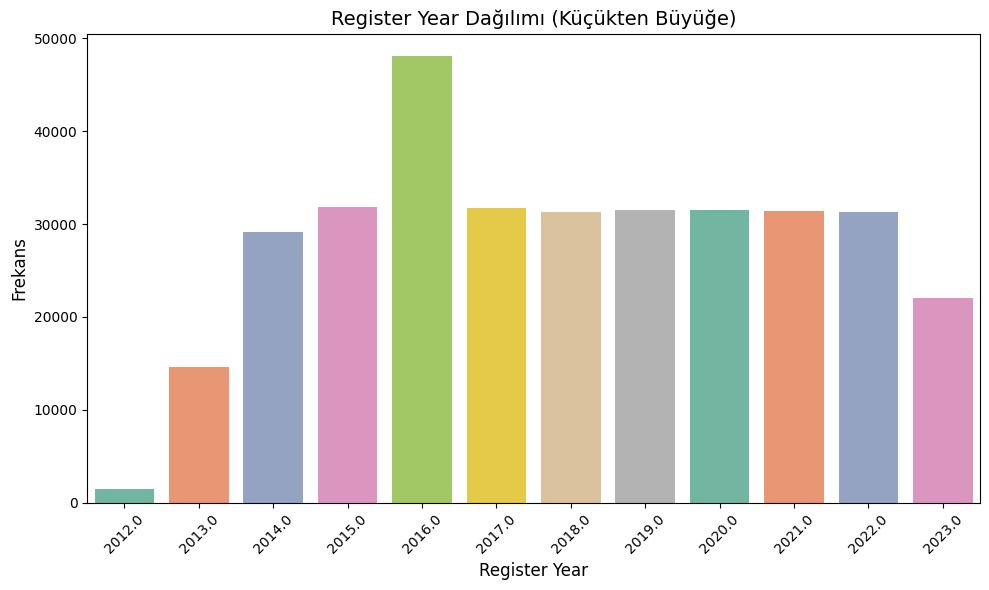

In [43]:
##Yıllara Göre Kayıt Olan Müşteri Sayısı
# 'register_year' değişkeninin benzersiz değerlerini küçükten büyüğe sıralayalım
sorted_years = sorted(df['register_year'].unique())

# 'register_year' değişkeninin dağılımını görselleştirmek için sıralı sütun grafiği
plt.figure(figsize=(10, 6))
sns.countplot(x='register_year', data=df, palette='Set2', order=sorted_years)

# Başlık ve etiketler
plt.title('Register Year Dağılımı (Küçükten Büyüğe)', fontsize=14)
plt.xlabel('Register Year', fontsize=12)
plt.ylabel('Frekans', fontsize=12)

# Grafiği göster
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

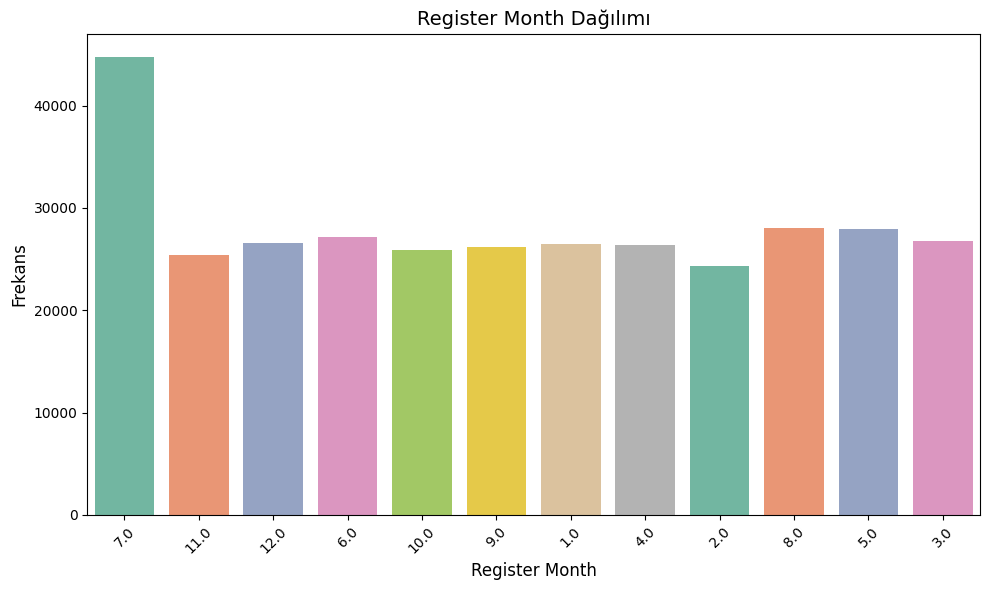

In [44]:
##Aylara göre kayıt olan müşteri sayısı

plt.figure(figsize=(10, 6))
sns.countplot(x='register_month', data=df, palette='Set2')

# Başlık ve etiketler
plt.title('Register Month Dağılımı', fontsize=14)
plt.xlabel('Register Month', fontsize=12)
plt.ylabel('Frekans', fontsize=12)

# Grafiği göster
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

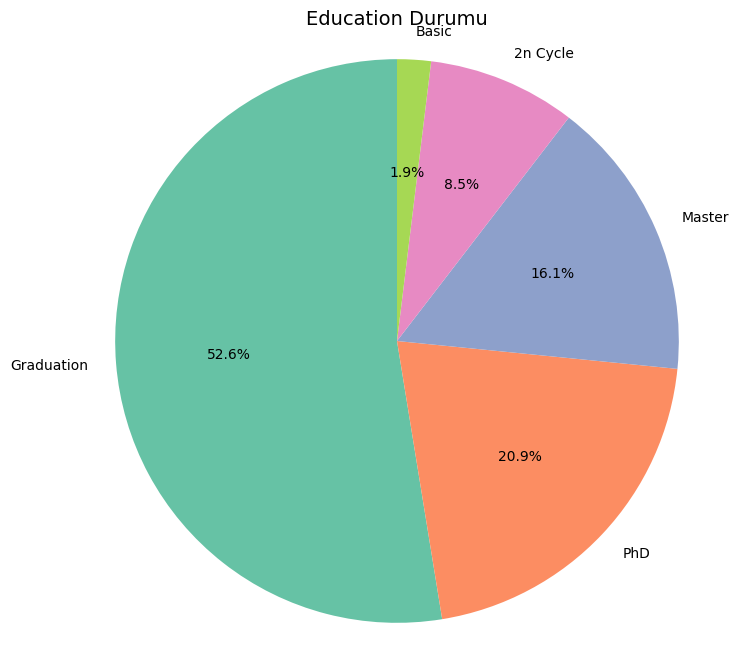

In [45]:
##Eğitim durumu pasta grafiği
plt.figure(figsize=(8, 8))

education_counts = df['Education'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(education_counts)))

# Başlık
plt.title('Education Durumu', fontsize=14)

# Grafiği göster
plt.axis('equal')  # Eşit boyutlu bir daire için
plt.show()

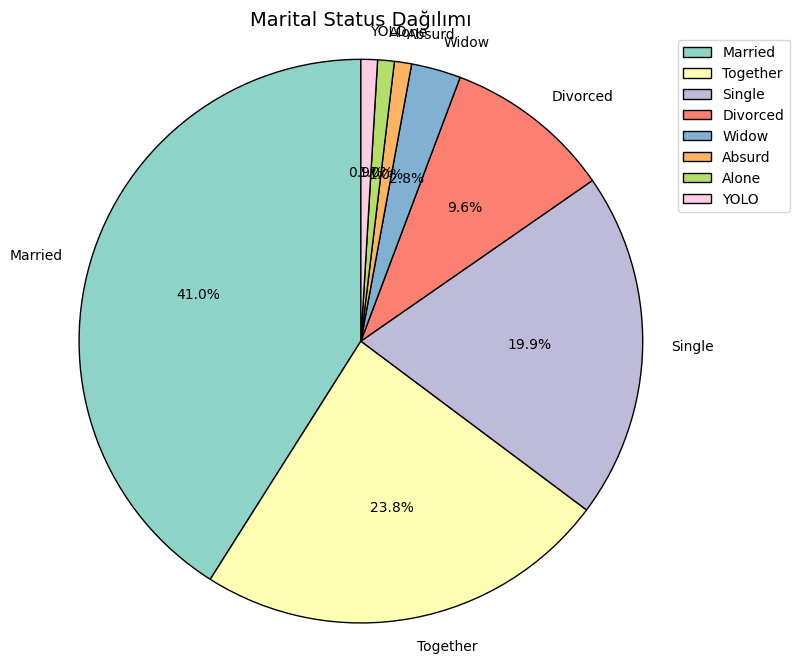

In [46]:
##Marial_Status Pasta Grafiği
plt.figure(figsize=(8, 8))

marital_status_counts = df['Marital_Status'].value_counts()
plt.pie(marital_status_counts, 
        labels=marital_status_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('Set3', len(marital_status_counts)),
        wedgeprops={'edgecolor': 'black'})  

plt.title('Marital Status Dağılımı', fontsize=14)

plt.legend(marital_status_counts.index, loc="upper left", bbox_to_anchor=(1, 1))

plt.axis('equal') 
plt.show()

In [47]:
##Kategorilerin toplam harcaması
columns_to_sum = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Toplamları hesapla
total_spending = df[columns_to_sum].sum()

# Sonuçları yazdır
print(total_spending)

MntWines            101348004.0
MntFruits             8630250.0
MntMeatProducts      54294698.0
MntFishProducts      13367475.0
MntSweetProducts      9256384.0
MntGoldProds         14411947.0
dtype: float64


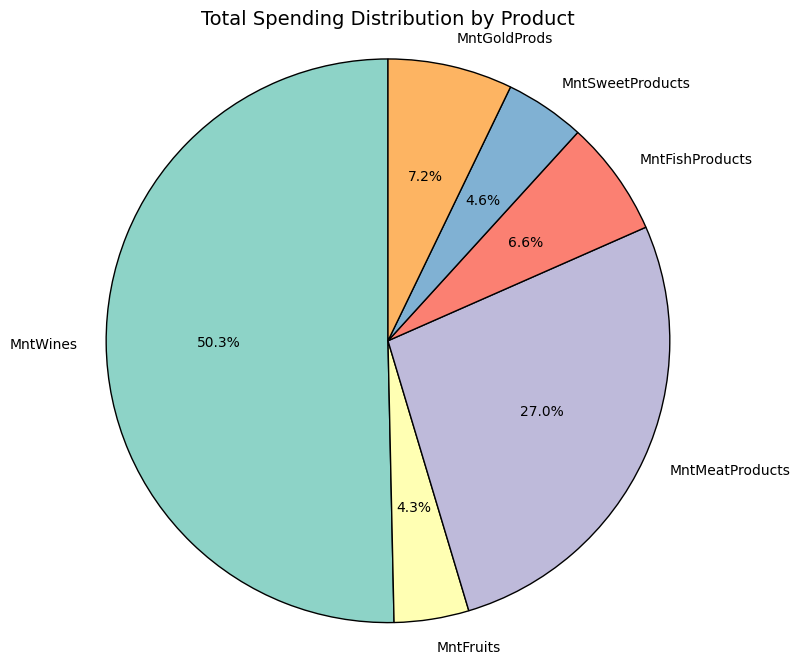

In [48]:
# Pie chart için görselleştirme
plt.figure(figsize=(8, 8))
plt.pie(total_spending, labels=total_spending.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette('Set3', len(total_spending)),
        wedgeprops={'edgecolor': 'black'})  # Dilimlere kenarlık ekler

# Başlık
plt.title('Total Spending Distribution by Product', fontsize=14)

# Grafiği göster
plt.axis('equal')  # Eşit boyutlu bir daire için
plt.show()

In [49]:
##Müşterilerin % kaçının çocuğu var bakalım.
count = df[(df['Kidhome'] == 1) | (df['Teenhome'] == 1)].shape[0]

# Toplam satır sayısını alalım
total_rows = df.shape[0]

# Yüzdeyi hesaplayalım
percentage = (count / total_rows) * 100

# Sonucu yazdıralım
print(f"En az bir çocuğu olan kişi sayısı: {count} ({percentage:.2f}%)")

En az bir çocuğu olan kişi sayısı: 127361 (37.90%)


In [50]:
df['total_spending'] = (df['MntWines'] + 
                        df['MntFruits'] + 
                        df['MntMeatProducts'] + 
                        df['MntFishProducts'] + 
                        df['MntSweetProducts'] + 
                        df['MntGoldProds'])

In [51]:
##Total_spending in evliliğe göre kırılımı
marital_spending = df.groupby('Marital_Status')['total_spending'].sum().reset_index()

print(marital_spending)

  Marital_Status  total_spending
0         Absurd       1963649.0
1          Alone       1953518.0
2       Divorced      19274508.0
3        Married      82674745.0
4         Single      40250528.0
5       Together      47450087.0
6          Widow       5753279.0
7           YOLO       1988444.0


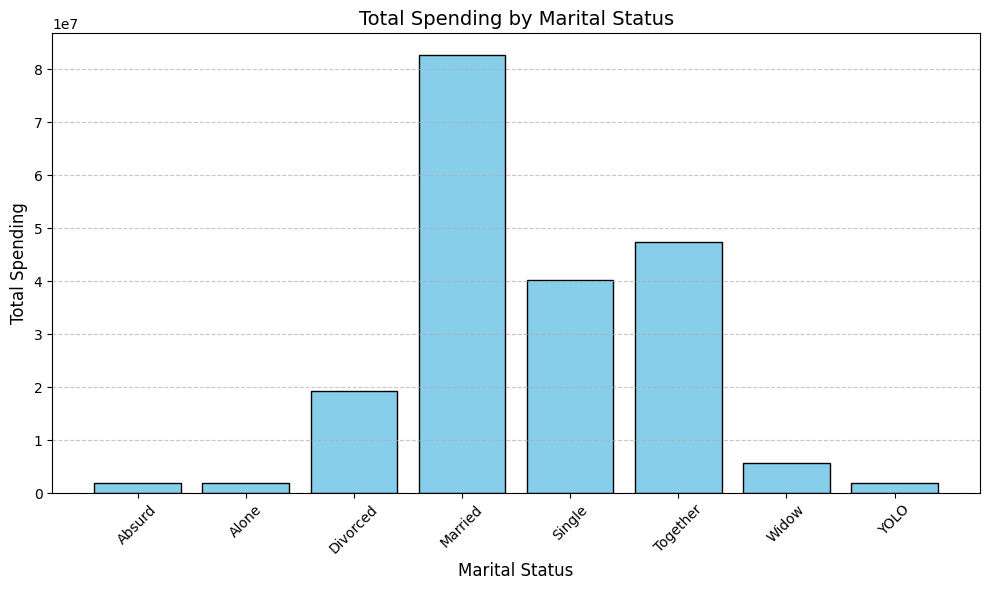

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(marital_spending['Marital_Status'], marital_spending['total_spending'], color='skyblue', edgecolor='black')

# Başlık ve eksen isimleri
plt.title('Total Spending by Marital Status', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Grafik gösterimi
plt.tight_layout()
plt.show()

In [53]:
##Eğitim seviyesine göre toplam harcama kırılımı
education_spending = df.groupby('Education')['total_spending'].sum().reset_index()

print(education_spending)

    Education  total_spending
0    2n Cycle      17381640.0
1       Basic       3865685.0
2  Graduation     105496138.0
3      Master      32478550.0
4         PhD      42086745.0


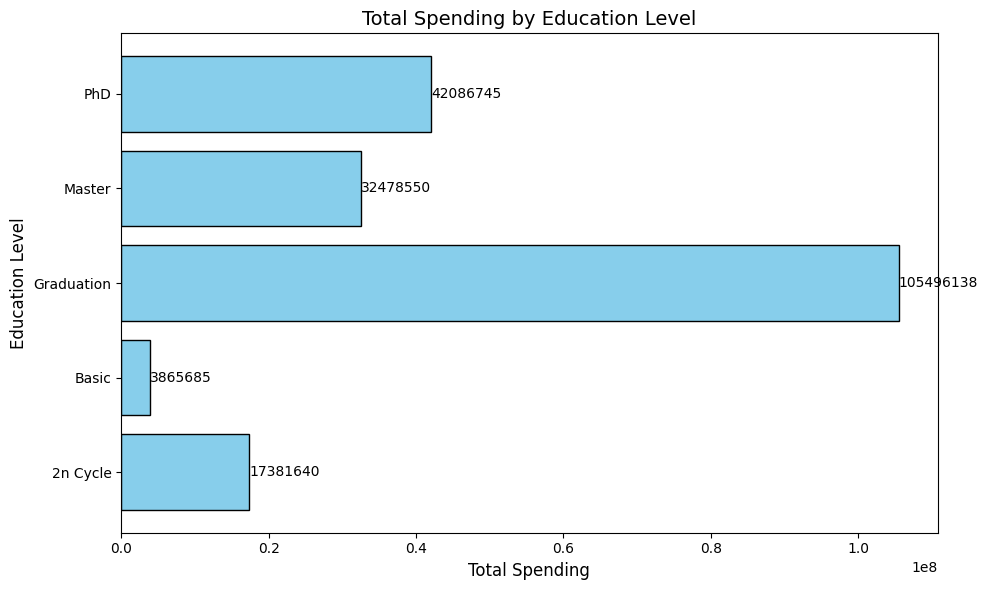

In [54]:
plt.figure(figsize=(10, 6))

plt.barh(education_spending['Education'], education_spending['total_spending'], color='skyblue', edgecolor='black')

plt.title('Total Spending by Education Level', fontsize=14)
plt.xlabel('Total Spending', fontsize=12)
plt.ylabel('Education Level', fontsize=12)

for index, value in enumerate(education_spending['total_spending']):
    plt.text(value, index, f'{value:.0f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

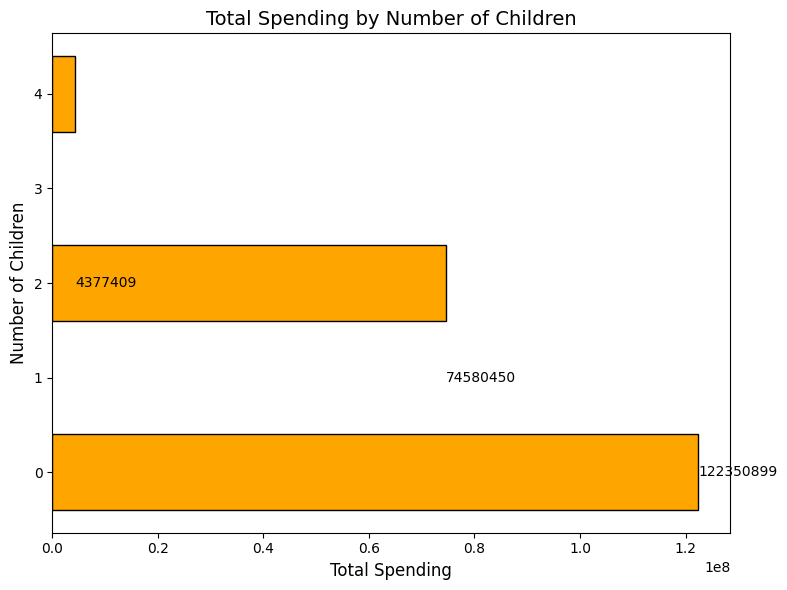

In [55]:
# Çocuk sayısına göre harcama kırılımı ve grafiği
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

children_spending = df.groupby('Total_Children')['total_spending'].sum().reset_index()

plt.figure(figsize=(8, 6))

plt.barh(children_spending['Total_Children'], children_spending['total_spending'], color='orange', edgecolor='black')


plt.title('Total Spending by Number of Children', fontsize=14)
plt.xlabel('Total Spending', fontsize=12)
plt.ylabel('Number of Children', fontsize=12)


for index, value in enumerate(children_spending['total_spending']):
    plt.text(value, index, f'{value:.0f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

In [56]:
##Kampanyadan Yararlanan Kişi Yüzdesi
response_counts = df['Response'].value_counts()
response_percentages = df['Response'].value_counts(normalize=True) * 100

response_summary = pd.DataFrame({
    'Count': response_counts,
    'Percentage (%)': response_percentages
}).reset_index()

response_summary.columns = ['Response', 'Count', 'Percentage (%)']

print(response_summary)

  Response   Count  Percentage (%)
0      0.0  176245       52.453088
1      1.0  159760       47.546912


In [57]:
##Kampanyalara Katılım Yüzdesi
campaign_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

campaign_percentages = {}

for col in campaign_columns:
    percentage = (df[col].value_counts(normalize=True).get(1, 0)) * 100
    campaign_percentages[col] = percentage

# Yüzdeleri gösterme
for col, percentage in campaign_percentages.items():
    print(f"{col}: {percentage:.2f}%")

AcceptedCmp3: 47.42%
AcceptedCmp4: 47.51%
AcceptedCmp5: 47.49%
AcceptedCmp1: 47.58%
AcceptedCmp2: 47.41%


In [58]:
##Complain yüzde dağılımı
complain_counts = df['Complain'].value_counts()
complain_percentages = df['Complain'].value_counts(normalize=True) * 100

print("Complain Sınıf Dağılımı:")
print(complain_counts)
print("\nComplain Yüzdeleri (%):")
print(complain_percentages)

Complain Sınıf Dağılımı:
Complain
0.0    333008
1.0      2997
Name: count, dtype: int64

Complain Yüzdeleri (%):
Complain
0.0    99.108049
1.0     0.891951
Name: proportion, dtype: float64


In [59]:
##Age Group Değişkeni oluşturup ortalama harcamalara bakalım.
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 136], labels=["18-30: Genç", "31-40: Orta Yaş", "41-50: Orta Yaşlı", "51-60: Yaşlı", "60+: Çok Yaşlı"], right=True)

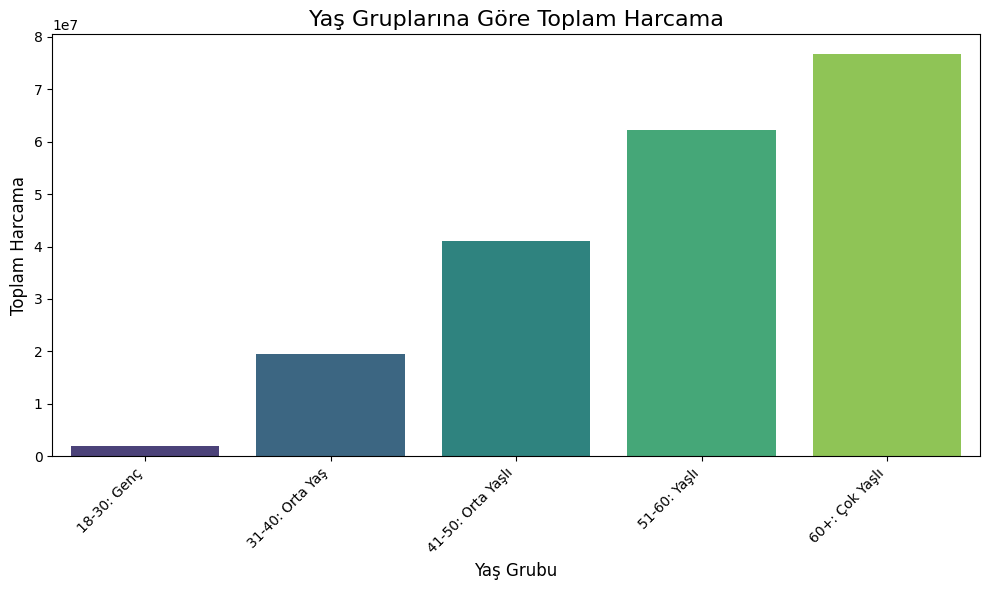

In [60]:
age_group_spending = df.groupby('Age_Group')['total_spending'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Age_Group', y='total_spending', data=age_group_spending, palette='viridis')

plt.title('Yaş Gruplarına Göre Toplam Harcama', fontsize=16)
plt.xlabel('Yaş Grubu', fontsize=12)
plt.ylabel('Toplam Harcama', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [61]:
##Yaş Grubu Yüzdesi
age_group_counts = df['Age_Group'].value_counts()
age_group_percentage = df['Age_Group'].value_counts(normalize=True) * 100
age_group_summary = pd.DataFrame({
    'Count': age_group_counts,
    'Percentage': age_group_percentage
})

print(age_group_summary)

                    Count  Percentage
Age_Group                            
60+: Çok Yaşlı     111273   33.116471
51-60: Yaşlı       108629   32.329578
41-50: Orta Yaşlı   80511   23.961251
31-40: Orta Yaş     33257    9.897769
18-30: Genç          2335    0.694930


# **6.Sonuç ve Öneriler**

Bu veri seti analiz edilerek satış miktarı artırabilinir.Müşteri verileri işlenerek müşterilerin kaçı evli,yaş aralıkları nelerdir,en çok hangi kategoride harcama yapılmış şirket ürün kategorisini buna göre düzenleyebilir.Kampanya katılımı az,bunu artırmak için müşteri verilerinden yararlanabilinir.Kişileştirilmiş indirim sunabilir firma.Mesela en az 1 çocuğu olan kişilerin et harcaması daha çoksa onlara et indirimini haber eder.

Kampanyaya katılan müşteri oranı yarıdan az.Kampanyaya katılan sınıf sınıflandırma algoritmaları ile tahmin edilebilinir.Bu sayede kampanyalar daha efektif yürümüş olur.Bunun için KNN,SVM,Random Forest,ID3 gibi yöntemler kullanılabilinir.

Veri seti müşteri segmentasyonu için çok uygundur.KMeans,DBSCAN,Hierarchical Clustering gibi yöntemler kullanılabilir.Her müşteri kümesine özel kampanya ve mailing oluşturulabilinir.Bu sayede satış sayısı artabilir.